In [24]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
ticker='AAPL'
start_date='2015-01-01'
end_date='2023-01-01'

data=yf.download(ticker, start=start_date, end=end_date)
data=data['Close']

[*********************100%***********************]  1 of 1 completed


In [26]:
returns = data.pct_change().dropna()

In [27]:
mean_return = returns.mean()
std_dev_return= returns.std()

In [28]:
def monte_carlo_simulation(strat_price, days, mean_return, std_dev_return,num_simulations):
    simulations= np.zeros((days, num_simulations))
    simulations[0]=start_price
    for t in range(1, days):
        random_walk=np.random.normal(mean_return, std_dev_return, num_simulations)
        simulations[t] = simulations[t-1]*(1+ random_walk)
    return simulations

In [29]:
days=252
num_simulations=100
start_price= data.iloc[-1]["AAPL"]
simulations=monte_carlo_simulation(start_price, days, mean_return, std_dev_return, num_simulations)

In [30]:
colors= plt.cm. tab20(np.arange(num_simulations)%20)

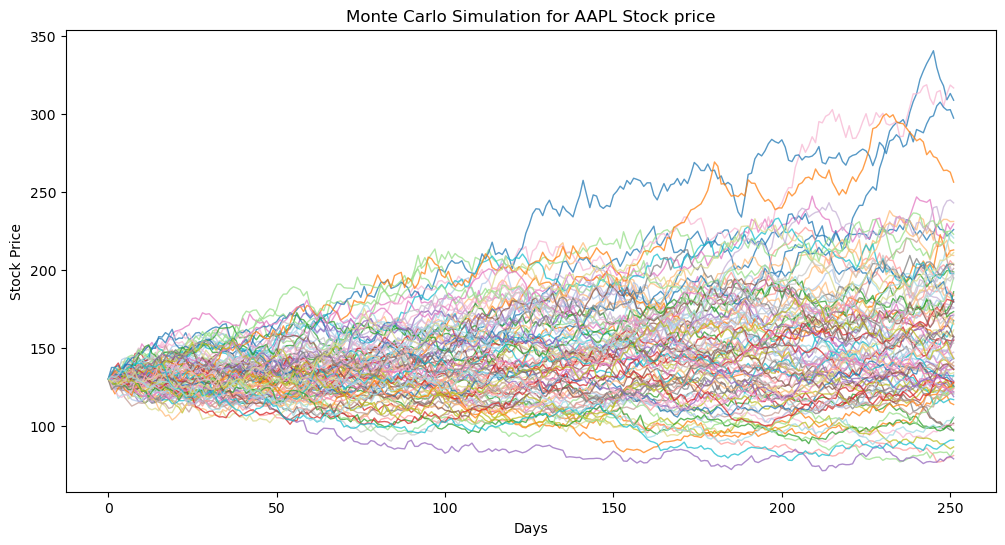

In [31]:
plt.figure(figsize=(12,6))

for i in range(num_simulations):
    plt.plot(simulations[:,i], color=colors[i], alpha=0.75, lw=1)

plt.title(f'Monte Carlo Simulation for {ticker} Stock price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.ylabel('Stock Price')
plt.show()

In [32]:
end_prices=simulations[-1,:]

expected_price= np.mean(end_prices)
std_dev_price= np.std(end_prices)

print(f"Expected Price after{days} days: $ {expected_price:.2f}")
print(f"Standard Deviation of Price after {days} days: ${std_dev_price:.2f}")

Expected Price after252 days: $ 159.82
Standard Deviation of Price after 252 days: $46.99
